In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

In [68]:
diamonds = pd.read_csv("dataset/diamonds.csv", index_col=0)

In [69]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


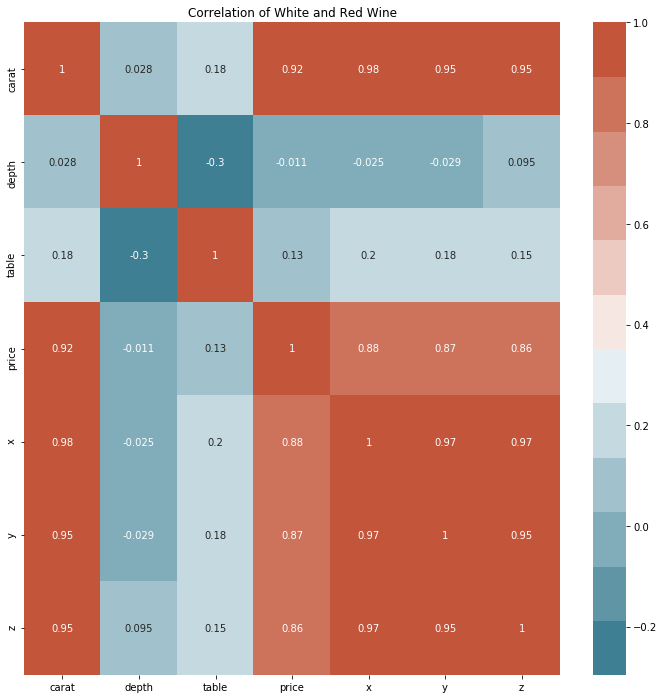

In [70]:
plt.figure(figsize=(12, 12))
df_corr = diamonds.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Correlation of White and Red Wine")
plt.show()

In [71]:
diamonds.loc[diamonds['cut'] == 'Fair', 'cut'] = 1
diamonds.loc[diamonds['cut'] == 'Good', 'cut'] = 2
diamonds.loc[diamonds['cut'] == 'Very Good', 'cut'] = 3
diamonds.loc[diamonds['cut'] == 'Premium', 'cut'] = 4
diamonds.loc[diamonds['cut'] == 'Ideal', 'cut'] = 5

In [72]:
diamonds.loc[diamonds['color'] == 'J', 'color'] = 1
diamonds.loc[diamonds['color'] == 'I', 'color'] = 2
diamonds.loc[diamonds['color'] == 'H', 'color'] = 3
diamonds.loc[diamonds['color'] == 'G', 'color'] = 4
diamonds.loc[diamonds['color'] == 'F', 'color'] = 5
diamonds.loc[diamonds['color'] == 'E', 'color'] = 6
diamonds.loc[diamonds['color'] == 'D', 'color'] = 7

In [73]:
diamonds.loc[diamonds['clarity'] == 'I1', 'clarity'] = 1
diamonds.loc[diamonds['clarity'] == 'SI2', 'clarity'] = 2
diamonds.loc[diamonds['clarity'] == 'SI1', 'clarity'] = 3
diamonds.loc[diamonds['clarity'] == 'VS2', 'clarity'] = 4
diamonds.loc[diamonds['clarity'] == 'VS1', 'clarity'] = 5
diamonds.loc[diamonds['clarity'] == 'VVS2', 'clarity'] = 6
diamonds.loc[diamonds['clarity'] == 'VVS1', 'clarity'] = 7
diamonds.loc[diamonds['clarity'] == 'IF', 'clarity'] = 8

In [74]:
X = diamonds[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y','z']]
y = diamonds[["price"]].values

In [75]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [77]:
Model = []
RMSE = []
MAE = []
MSE = []
R_Square = []
adj_rsquared = []
CV = []

In [78]:
names = ["Linear Regression", "Ridge Regression", "Lasso Regression",
         "Decision Tree Regressor", "Random Forest Regressor", "Gradient Boosting Regressor",
         "Adaboost Regressor", "BaggingRegressor", "ExtraTreesRegressor","XGBRegressor", "XGBRFRegressor"]
models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor(), BaggingRegressor(), ExtraTreesRegressor(),XGBRegressor(), XGBRFRegressor()]

In [79]:
def evaluate(true, predicted, variable_of_model):
    MAE.append(metrics.mean_absolute_error(true, predicted))
    MSE.append(metrics.mean_squared_error(true, predicted))
    RMSE.append(np.sqrt(metrics.mean_squared_error(true, predicted)))
    R_Square.append(metrics.r2_score(true, predicted))
    n= X_test.shape[0]
    p= X_test.shape[1] - 1
    adj_rsquared.append(1 - (1 - R_Square[-1]) * ((n - 1)/(n-p-1)))
    cv_accuracies = cross_val_score(estimator = variable_of_model, X = X_train, y = y_train.ravel(), cv = 5,verbose = 1)
    CV.append(cv_accuracies.mean())

In [80]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    n= X_test.shape[0]
    p= X_test.shape[1] - 1
    adj_rsquared = 1 - (1 - r2_square) * ((n - 1)/(n-p-1))
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Square", r2_square)
    print("adj R Square", adj_rsquared)

In [103]:
def fit_and_predict(name, model):
    variable_of_model = model
    variable_of_model.fit(X_train, y_train.ravel())
    pred = variable_of_model.predict(X_test)
    pred_vis(name, y_test, pred)
    evaluate(y_test, pred, variable_of_model)

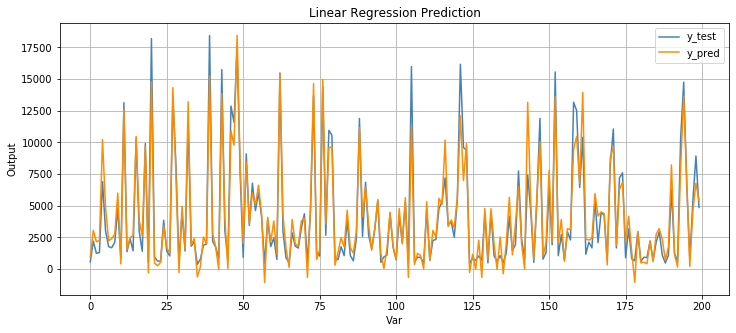

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


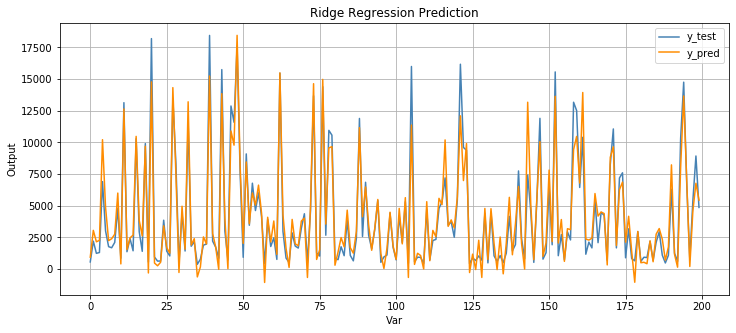

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


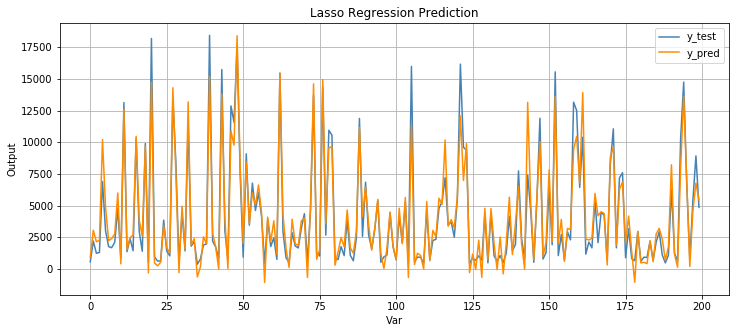

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


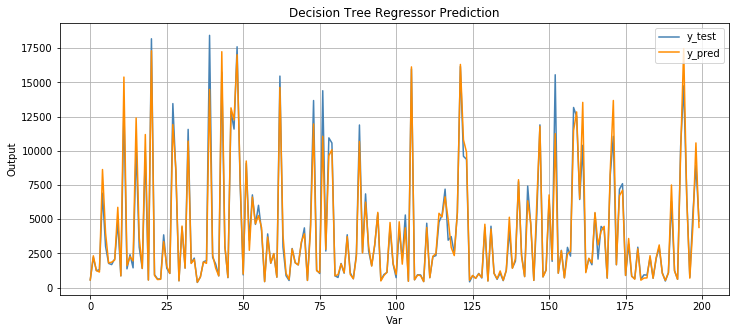

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished


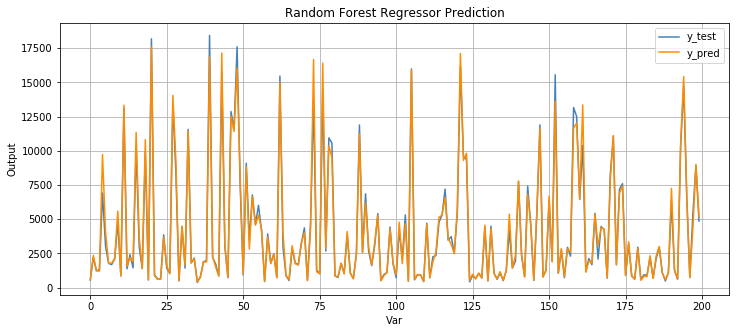

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.4min finished


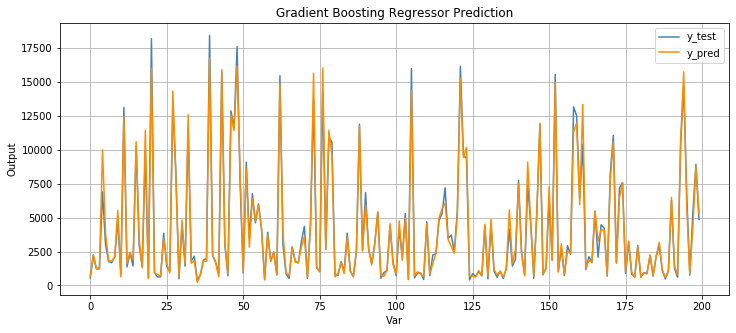

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.4s finished


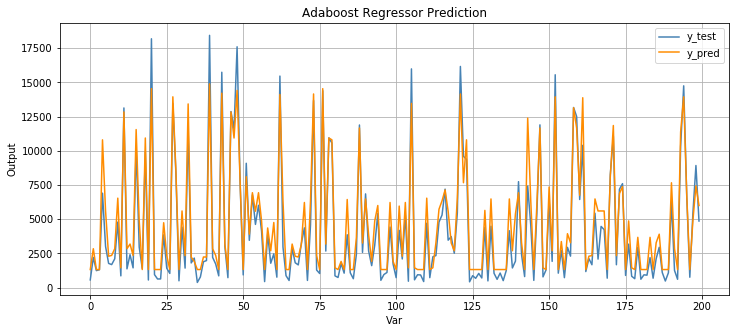

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.7s finished


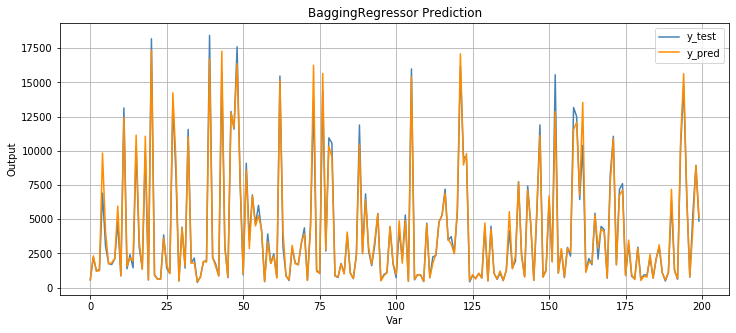

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.0s finished


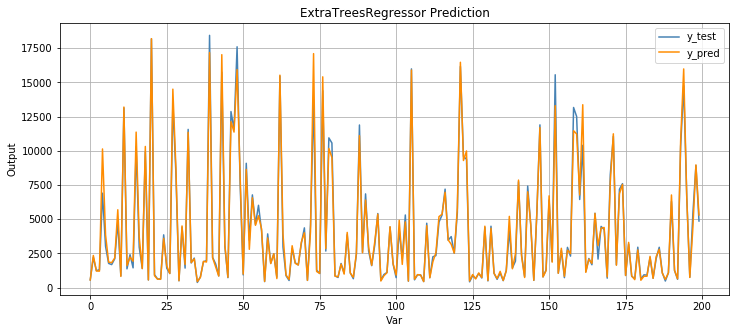

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished


In [ ]:
for name, model in zip(names, models):
    fit_and_predict(name, model)

In [85]:
evaluation_dataframe = pd.DataFrame({"Model": names,
                                     "MAE": MAE,
                                     "MSE": MSE,
                                     "RMSE": RMSE,
                                     "R Squared": R_Square,
                                     "adj R Squared": adj_rsquared,
                                     "Cross Validation": CV})

In [88]:
evaluation_dataframe = evaluation_dataframe.sort_values("adj R Squared")

In [89]:
evaluation_dataframe

,Model,MAE,MSE,RMSE,R Squared,adj R Squared,Cross Validation
2,Lasso Regression,806.528249,1.499715e+06,1224.628491,0.905659,0.905589,0.907182
0,Linear Regression,805.274366,1.499637e+06,1224.596542,0.905664,0.905594,0.907122
1,Ridge Regression,805.364487,1.499618e+06,1224.588886,0.905666,0.905596,0.907124
6,Adaboost Regressor,870.285018,1.291138e+06,1136.282447,0.918780,0.918720,0.918530
10,XGBRFRegressor,436.879141,5.911960e+05,768.892728,0.962810,0.962783,0.961185
3,Decision Tree Regressor,351.164952,5.212101e+05,721.948814,0.967213,0.967189,0.964420
5,Gradient Boosting Regressor,336.621816,3.712525e+05,609.304958,0.976646,0.976629,0.975225
7,BaggingRegressor,280.614160,3.244802e+05,569.631604,0.979588,0.979573,0.979309
4,Random Forest Regressor,266.059583,2.944513e+05,542.633634,0.981477,0.981464,0.981032
9,XGBRegressor,274.684170,2.936233e+05,541.870230,0.981529,0.981516,0.980844
